# STAT 207 Homework 3 [25 points]

## Populations, Samples, and Summarizing Data

Due: Thursday, February 13, end of day (11:59 pm CT)

Late Submissions accepted until Friday, February 14 at noon

<hr>

## Python Component

Run the following code chunk to import the pandas package needed for this assignment and the optional visualization packages:

- pandas
- matplotlib.pyplot
- seaborn

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 1. Read in the Data [0.5 points]

The Olympics is a worldwide event where athletes from multiple sports all compete in one meet.  Top athletes prepare for months to make history with their athletic prowess.  

Information about athletes that have competed in the Olympics are contained in the athlete_events.csv file located in this folder (originally from https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results).

Each competitor in a distinct Olympic competition is displayed in their own row in the data.

Read this file in.  No need to drop any missing values.

In [27]:
df = pd.read_csv("athlete_events.csv")
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [29]:
df['NOC'].unique()

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

In [17]:
len(df['NOC'].unique())

230

In [22]:
print(df['NOC'].value_counts(dropna=False))

NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
       ...  
YMD        5
SSD        3
UNK        2
NBO        2
NFL        1
Name: count, Length: 230, dtype: int64


In [24]:
print(df['NOC'].isin(['', ' ']).sum())

0


In [28]:
print(df[df['NOC'] == 'UNK'].shape[0])

2


In [6]:
df['Medal'].isna().sum()

231333

In [14]:
df['Sport'].value_counts()

Sport
Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: count, Length: 66, dtype: int64

## 2. Populations and Samples [0 points]

You can use this space to analyze the dataset.  All points for Question 2 will come from Gradescope.

In [16]:
min_year = df['Year'].min()

max_year = df['Year'].max()

print("Minimum Year:", min_year)
print("Maximum Year:", max_year)

Minimum Year: 1896
Maximum Year: 2016


In [20]:
df['Age'].mean()

25.556898357297374

In [30]:
min_age = df['Age'].min()

max_age = df['Age'].max()

print("Minimum Year:", min_age)
print("Maximum Year:", max_age)

Minimum Year: 10.0
Maximum Year: 97.0


## 3. Exploring Athlete Weights [2 points]

**a)** First, generate a graphical summary (histogram or boxplot) of the weight variable.

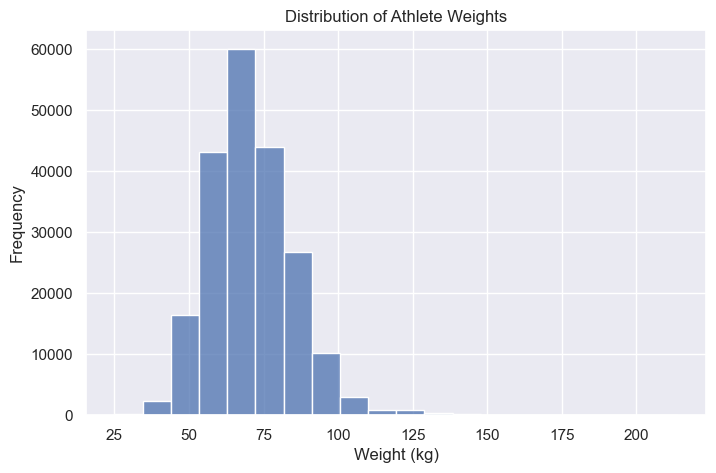

In [50]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Weight'].dropna(), bins=20)
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.title("Distribution of Weights")
plt.show()

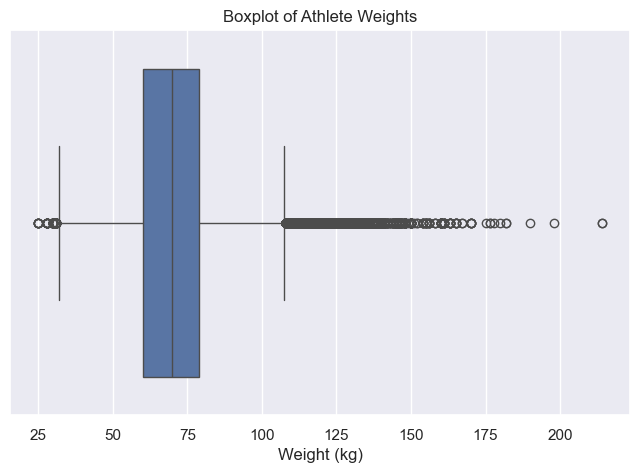

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Weight'])
plt.xlabel("Weight (kg)")
plt.title("Boxplot of Athlete Weights")
plt.show()

**b)** We'd like to explore the weight of athletes (`weight`) depending on the season of the competition (`season`).  This time, generate a set of numerical summaries for `weight` depending on the `season`.  For full credit, do so in one line of code.

For the numerical summaries, be sure that both the mean and the median are included.

In [44]:
df.groupby('Season')['Weight'].agg(['mean', 'median', 'min', 'max', 'std', 'count'])

,mean,median,min,max,std,count
Season,,,,,,
Summer,70.689060,70.0,25.0,214.0,14.803940,168698
Winter,70.759275,70.0,32.0,145.0,12.213273,39543


## 4. Two Way Table [1 point]

Generate a two-way table to compare the sex of the athlete with the season of competition.  You may choose whether you'd like counts or proportions displayed.

In [60]:
table_prop = pd.crosstab(df['Sex'], df['Season'], normalize='index')
table_prop

Season,Summer,Winter
Sex,,
F,0.797657,0.202343
M,0.829674,0.170326


## 5. Creating a Sample [2 points]

Now, we'll consider the heights of athletes.

**a)** Take a random sample of 200 athletes from the data.  

In [35]:
sample = df.dropna(subset=['Height']).sample(n=200, random_state=42)

sample.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
230350,115619,Karen Elizabeth Straker-Dixon,F,27.0,165.0,58.0,Great Britain,GBR,1992 Summer,1992,Summer,Barcelona,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",NaN
201714,101313,Martin Wade Roberts,M,22.0,199.0,84.0,Australia,AUS,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,NaN
27334,14197,Stphanie Bouvier,F,28.0,163.0,58.0,France,FRA,2010 Winter,2010,Winter,Vancouver,Short Track Speed Skating,Short Track Speed Skating Women's 500 metres,NaN
177931,89408,Frederic Orendi,M,34.0,170.0,66.0,Romania,ROU,1964 Summer,1964,Summer,Tokyo,Gymnastics,Gymnastics Men's Pommelled Horse,NaN
224353,112697,Bertil Lennart Sderberg,M,25.0,179.0,80.0,Sweden,SWE,1972 Summer,1972,Summer,Munich,Handball,Handball Men's Handball,NaN


**b)** Compare the heights of the 200 athletes from your random sample with the full data using at least one of numerical summaries or graphical displays.  You may choose how to compare these distributions.

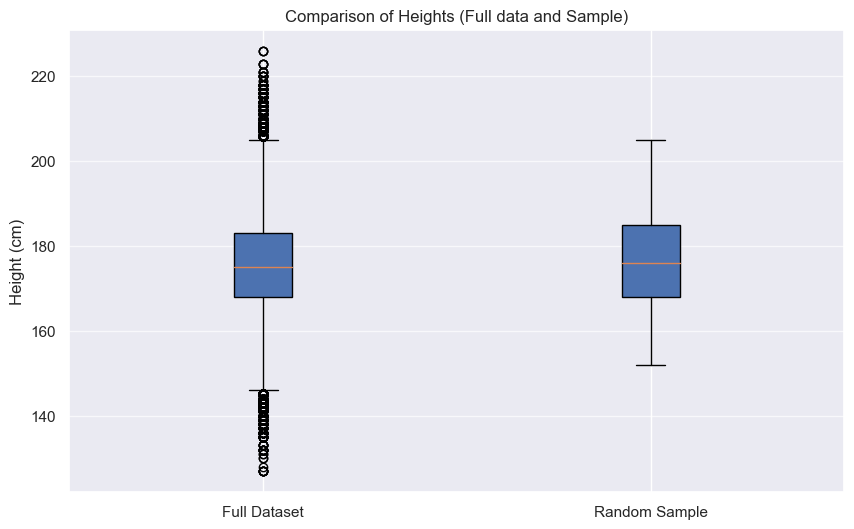

In [43]:
plt.figure(figsize=(10, 6))
plt.boxplot([df["Height"].dropna(), sample["Height"].dropna()],
    labels=["Full Dataset", "Random Sample"],
    patch_artist=True)

plt.ylabel("Height (cm)")
plt.title("Comparison of Heights (Full data and Sample)")
plt.grid(axis="y", alpha=0.7)

plt.show()

Remember to keep all your cells and hit the save icon above periodically to checkpoint (save) your results on your local computer. Once you are satisified with your results restart the kernel and run all (Kernel -> Restart & Run All). **Make sure nothing has changed**. Checkpoint and exit (File -> Save and Checkpoint + File -> Close and Halt). Follow the instructions on the Homework 3 Canvas Assignment to submit your notebook to GitHub.  Be sure to also complete the Gradescope component of this assignment.